# **Study of Object Detection and Classification Models**

On the CalTech Dataset, models for detection and classification were implemented, and the GIoU
        score for bounding box regression and the F1 Score for classification were compared.
The models used and studied were VGG19, Resnet50 and Xception.

Data Download Link: https://drive.google.com/drive/folders/1nOkLBQdy_FeW3pcGgdnOSl2Oe-Bcxjj_?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 27.2 MB/s 


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import Xception
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import torch
from torchvision.ops.boxes import _box_inter_union
import tensorflow_addons as tfa
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# **Converting image into numpy arrays**




In [ ]:
# Paths of train, test and validation image data
train_path = '/content/drive/MyDrive/Image Processing/Train'
test_path = '/content/drive/MyDrive/Image Processing/Test'
validation_path = '/content/drive/MyDrive/Image Processing/Validation'



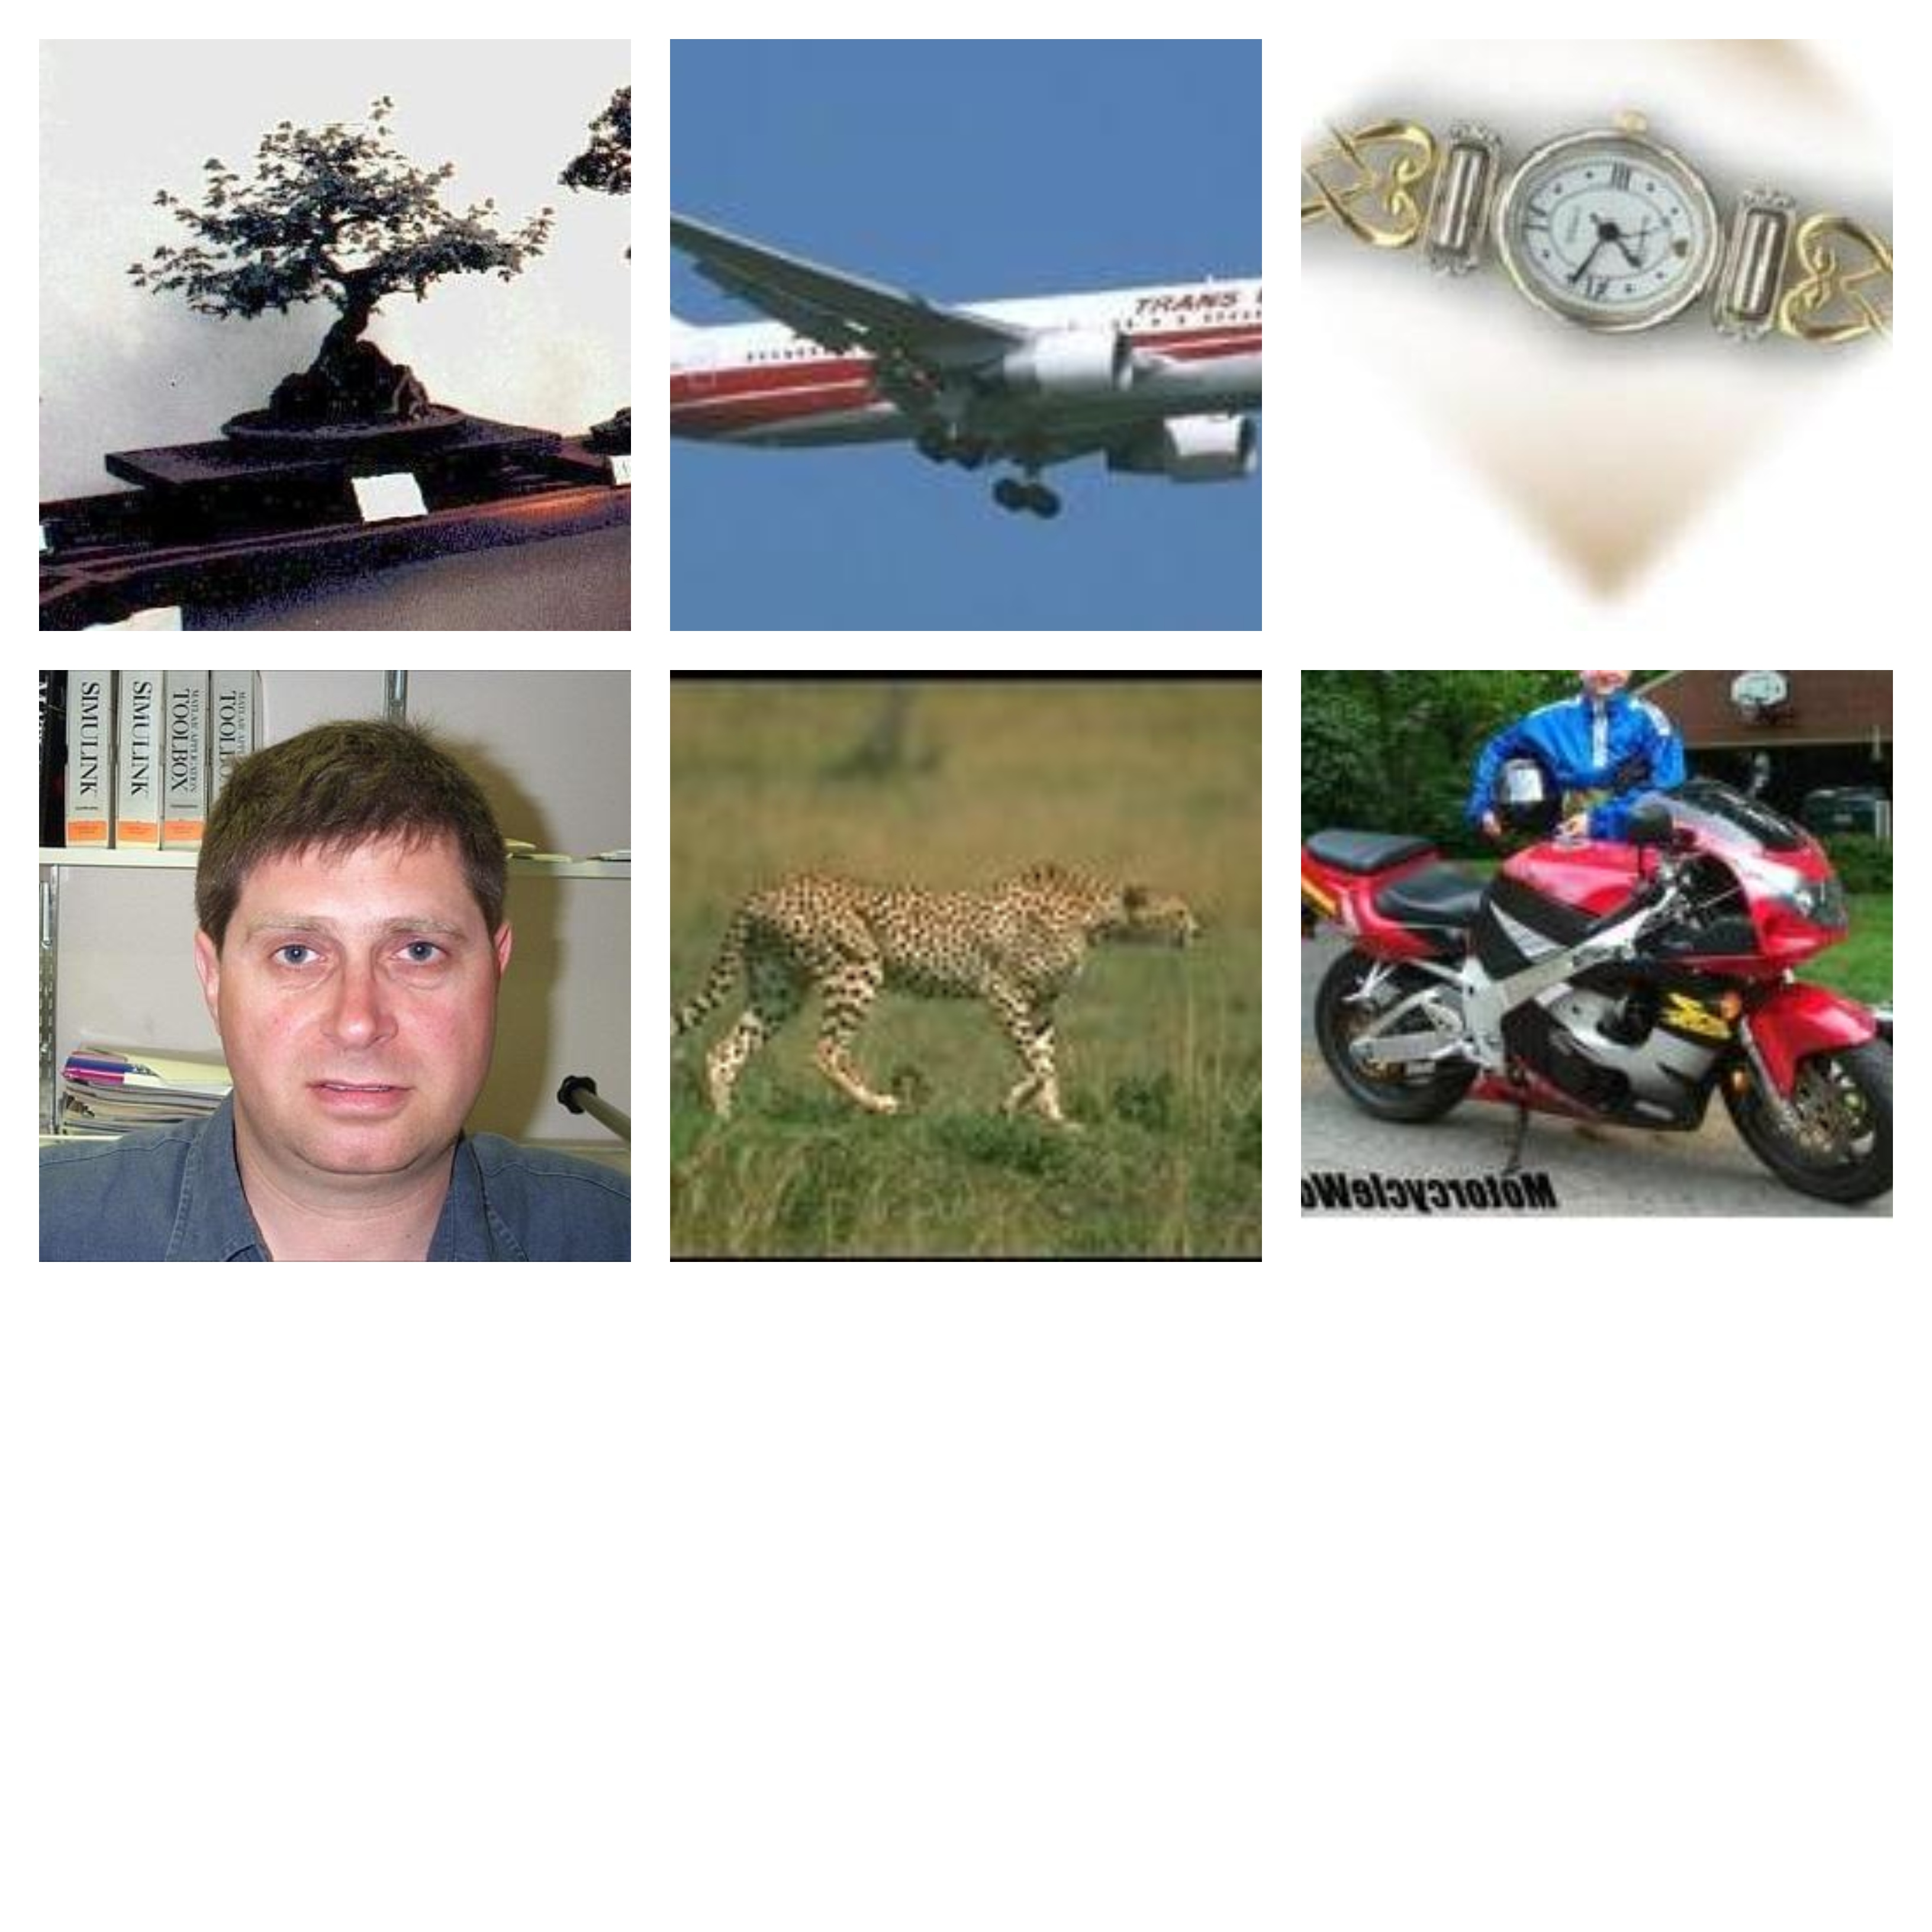

In [ ]:
# creating a empty list and iterating over every files in image folder and converting them into array and appending them in the created list.

train_images = []
for filename in sorted(os.listdir(train_path)):
    train_class_fullpath = os.path.join(train_path, filename)
 #   print(len(sorted(os.listdir(train_class_fullpath))))
    for filename2 in sorted(os.listdir(train_class_fullpath)):
        train_image_fullpath = os.path.join(train_class_fullpath, filename2)
        train_img = load_img(train_image_fullpath, target_size=(224,224)) #default input size of the vgg models = (224,224)
        train_img_arr = img_to_array(train_img)
        train_images.append(train_img_arr)

# Converting list into numpy arrays
train_images = np.array(train_images)

In [ ]:
train_images.shape

(1798, 224, 224, 3)

In [ ]:
# creating a empty list and iterating over every files in image folder and converting them into array and appending them in the created list.
val_images = []
for objname in sorted(os.listdir(validation_path)):
    val_class_fullpath = os.path.join(validation_path, objname)
    for filename in sorted(os.listdir(val_class_fullpath)):
        val_image_fullpath = os.path.join(val_class_fullpath, filename)
        val_img = load_img(val_image_fullpath, target_size=(224,224)) #default input size of the vgg models = (224,224)
        val_img_arr = img_to_array(val_img)
        val_images.append(val_img_arr)
  
# Converting list into numpy arrays
val_images = np.array(val_images)

In [ ]:
val_images.shape

(402, 224, 224, 3)

In [ ]:
# creating a empty list and iterating over every files in image folder and converting them into array and appending them in the created list.
test_images = []
for objname in sorted(os.listdir(test_path)):
    test_class_fullpath = os.path.join(test_path, objname)
    for filename in sorted(os.listdir(test_class_fullpath)):
        test_image_fullpath = os.path.join(test_class_fullpath, filename)
        test_img = load_img(test_image_fullpath, target_size=(224,224)) #default input size of the vgg models = (224,224)
        test_img_arr = img_to_array(test_img)
        test_images.append(test_img_arr)

# Converting list into numpy arrays
test_images = np.array(test_images)

In [ ]:
test_images.shape

(400, 224, 224, 3)

# **Storing the bb coordinates in numpy arrays(target)**

In [ ]:
# Paths of train, test and validation bounding box coordinates
train_path1 = '/content/drive/MyDrive/Image Processing/Annotations/Train'
test_path1 = '/content/drive/MyDrive/Image Processing/Annotations/Test'
validation_path1 = '/content/drive/MyDrive/Image Processing/Annotations/Validation'

In [ ]:
# Creating a empty list and iterating over bb coordinates and appending them in the list.
train_targets = []
train_classes = []
i = 0
x = np.eye(len(os.listdir(train_path1)))
for objname in sorted(os.listdir(train_path1)):
  train_class_fullpath = os.path.join(train_path1, objname)
 # print(len(sorted(list(set(os.listdir(train_class_fullpath))))))
  print(len(os.listdir(train_class_fullpath)))
  for filename in sorted(list(set(os.listdir(train_class_fullpath)))):
      train_image_fullpath = os.path.join(train_class_fullpath, filename)
      annots = loadmat(train_image_fullpath)
      x1 = annots['box_coord'][0][2]
      y1 = annots['box_coord'][0][0]
      x2 = annots['box_coord'][0][3]
      y2 = annots['box_coord'][0][1]
      train_targets.append((x1,y1,x2,y2))

      y = x[i,:]
      train_classes.append(y)  
  i+=1


# Converting list into numpy array
train_targets = np.array(train_targets)
train_classes = np.array(train_classes).astype('int32')

600
88
303
140
500
167


In [ ]:
train_classes.shape

(1798, 6)

In [ ]:
# Creating a empty list and iterating over bb coordinates and appending them in the list.
val_targets = []
val_classes = []
i = 0
x = np.eye(len(os.listdir(validation_path1)))

for objname in sorted(os.listdir(validation_path1)):
  val_class_fullpath = os.path.join(validation_path1, objname)
  print(len(os.listdir(val_class_fullpath)))
  for filename in sorted(os.listdir(val_class_fullpath)):
      val_image_fullpath = os.path.join(val_class_fullpath, filename)
      annots = loadmat(val_image_fullpath)
      x1 = annots['box_coord'][0][2]
      y1 = annots['box_coord'][0][0]
      x2 = annots['box_coord'][0][3]
      y2 = annots['box_coord'][0][1]
      val_targets.append((x1,y1,x2,y2))

      y = x[i,:]
      val_classes.append(y)  
  i+=1

# Converting list into numpy array
val_targets = np.array(val_targets)
val_classes = np.array(val_classes).astype('int32')

100
20
66
30
150
36


In [ ]:
val_classes.shape

(402, 6)

In [ ]:
# Creating a empty list and iterating over bb coordinates and appending them in the list.
test_targets = []
test_classes = []
i = 0
x = np.eye(len(os.listdir(test_path1)))


for objname in sorted(os.listdir(test_path1)):
  test_class_fullpath = os.path.join(test_path1, objname)
  print(len(os.listdir(test_class_fullpath)))
  for filename in sorted(os.listdir(test_class_fullpath)):
      test_image_fullpath = os.path.join(test_class_fullpath, filename)
      annots = loadmat(test_image_fullpath)
      x1 = annots['box_coord'][0][2]
      y1 = annots['box_coord'][0][0]
      x2 = annots['box_coord'][0][3]
      y2 = annots['box_coord'][0][1]
      test_targets.append((x1,y1,x2,y2))

      y = x[i,:]
      test_classes.append(y)  
  i+=1

# Converting list into numpy array
test_targets = np.array(test_targets)
test_classes = np.array(test_classes).astype('int32')

100
20
66
30
148
36


In [ ]:
test_classes.shape

(400, 6)

# **VGG 19**

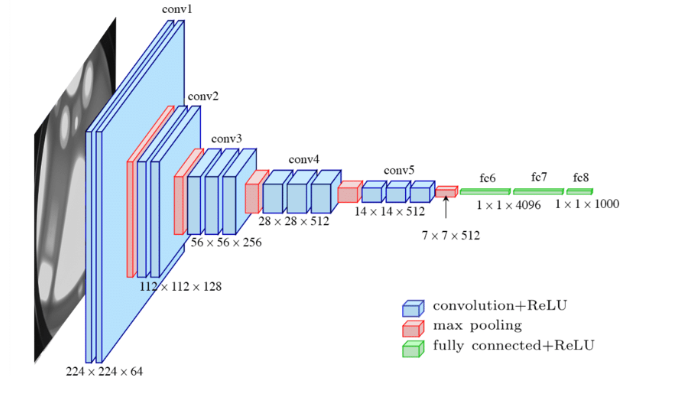

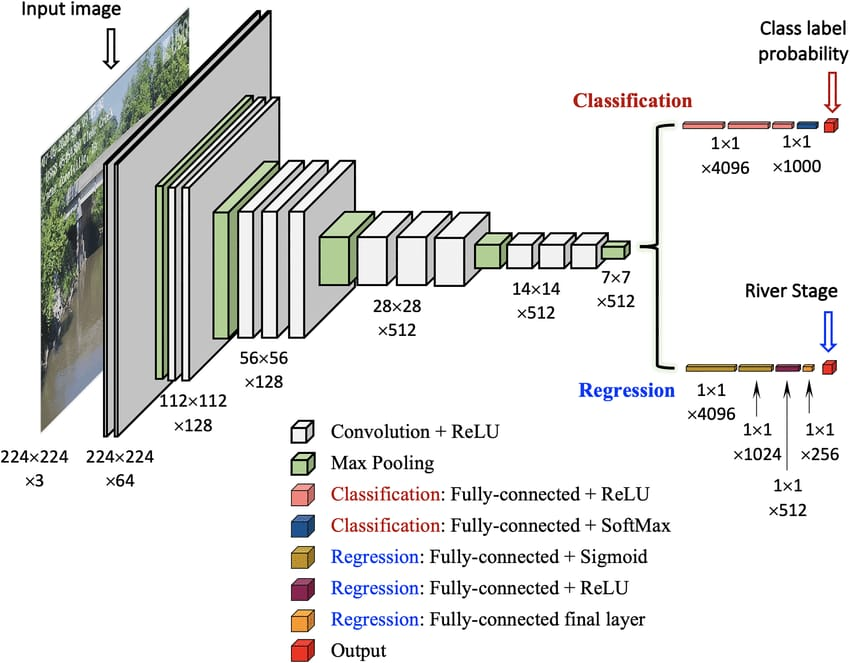

In [ ]:
#default input size of the vgg models = (224,224)
image_size = [224,224]

#Loading the pretrained vgg19 model(pretrained on imagenet dataset) from keras
vgg19 = VGG19(input_shape=image_size+[3], weights = 'imagenet', include_top = False)

#Freezing the top layers in the model
for layer in vgg19.layers:
   layer.trainable = False

# Building the custom layers for bb regression on top of vgg19 model
out = vgg19.output
flat = Flatten()(out)
FCL1 = Dense(128,activation = 'relu')(flat)
FCL2 = Dense(32,activation = 'relu')(FCL1)
OutR = Dense(4)(FCL2)



# Building the custom layers for multiclass Classification on top of vgg19 model parallel to regression layer
out = vgg19.output
flat = Flatten()(out)
ClassL1 = Dense(128,activation = 'relu')(flat)
OutL = Dense(6,activation = 'softmax')(ClassL1)

model = Model(inputs = vgg19.input, outputs = [OutR,OutL])

# Using Mean Squared Error loss and General Intersection over Union metric for the model.
model.compile(
    loss = [tensorflow.keras.losses.MeanSquaredError(),tensorflow.keras.losses.CategoricalCrossentropy()],
    optimizer = 'adam',
    metrics = [tensorflow.keras.metrics.MeanSquaredError(),tensorflow.keras.metrics.CategoricalCrossentropy()]
)
model.summary()

80150528/80134624 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                             

In [ ]:
# Train the model for 20 epochs
trained_model = model.fit(train_images, [train_targets,train_classes],
                validation_data = (val_images, [val_targets,val_classes]),
                batch_size=10,
                epochs=20,
                shuffle=True,
                verbose=1)

Epoch 1/20
50/50 [==============================] - 18s 117ms/step - loss: 1662.7172 - dense_2_loss: 1662.5933 - dense_4_loss: 0.1239 - dense_2_mean_squared_error: 1662.5933 - dense_2_categorical_crossentropy: 588.0889 - dense_4_mean_squared_error: 0.0079 - dense_4_categorical_crossentropy: 0.1239 - val_loss: 457.8375 - val_dense_2_loss: 457.8375 - val_dense_4_loss: 0.0000e+00 - val_dense_2_mean_squared_error: 457.8375 - val_dense_2_categorical_crossentropy: 523.5136 - val_dense_4_mean_squared_error: 0.0000e+00 - val_dense_4_categorical_crossentropy: 0.0000e+00
Epoch 2/20
50/50 [==============================] - 5s 109ms/step - loss: 956.2679 - dense_2_loss: 956.2679 - dense_4_loss: 0.0000e+00 - dense_2_mean_squared_error: 956.2679 - dense_2_categorical_crossentropy: 538.7415 - dense_4_mean_squared_error: 0.0000e+00 - dense_4_categorical_crossentropy: 0.0000e+00 - val_loss: 325.6213 - val_dense_2_loss: 325.6213 - val_dense_4_loss: 0.0000e+00 - val_dense_2_mean_squared_error: 325.6213 -

# **Code to save and load the model**

In [ ]:
#from tensorflow.keras.models import load_model
#model.save('/content/drive/MyDrive/Image Processing/Models/model_vg19.h5')
#model = load_model('/content/drive/MyDrive/Image Processing/Models/model_vg19.h5')

Checking the prediction for random data in 

In [ ]:
pred_y = model.predict(test_images,
                         batch_size = 100, 
                         verbose = 1)


4/4 [==============================] - 12s 469ms/step


In [ ]:
x = (test_targets - actual_y[0].astype(np.uint16))*(test_targets - actual_y[0].astype(np.uint16))
MSE = np.sum(x)/1600
MSE

529.6375

## Function for calculating Generalized IOU Score

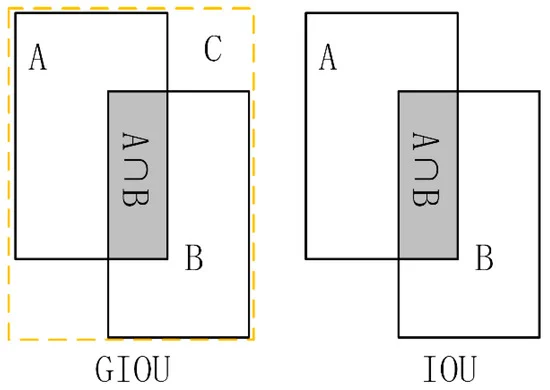

In [ ]:
def giou_loss(input_boxes, target_boxes, eps=1e-7):

    inter, union = _box_inter_union(input_boxes, target_boxes)
    iou = inter / union

    # area of the smallest enclosing box
    min_box = torch.min(input_boxes, target_boxes)
    max_box = torch.max(input_boxes, target_boxes)
    area_c = (max_box[:, 2] - min_box[:, 0]) * (max_box[:, 3] - min_box[:, 1])

    giou = iou - ((area_c - union) / (area_c + eps))

    loss = 1 - giou

    return loss.sum()/(input_boxes.shape)[0]

In [ ]:
Loss  = giou_loss(torch.tensor(test_targets.astype(np.float32)), torch.tensor(actual_y[0]))
print(Loss.item())

69.73745727539062


In [ ]:
#CC = tensorflow.metrics.CategoricalCrossentropy()
CC = tfa.metrics.F1Score(num_classes=6)#, threshold=0.5)
CC.update_state(test_classes,actual_y[1])
CC = CC.result().numpy()
print(CC)

[0.61538464 0.5555555  0.9428571  0.53571427 0.9833887  0.9230769 ]


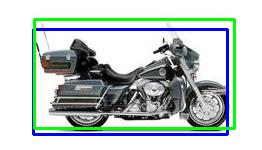

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#y_pred = model.predict(test_images[1])
m = pred_y[0][218]
n = test_targets[218]
image = cv2.imread('/content/drive/MyDrive/Image Processing/Train/MotorBikes/image_0004.jpg')
cv2.rectangle(image, (n[0],n[1]), (n[2],n[3]), (255,0,0), 2)
cv2.rectangle(image, (m[0],m[1]), (m[2],m[3]), (0,255,0), 2)
cv2_imshow(image)
cv2.waitKey(0)
# predicted green
# actual blue

# **Xception**

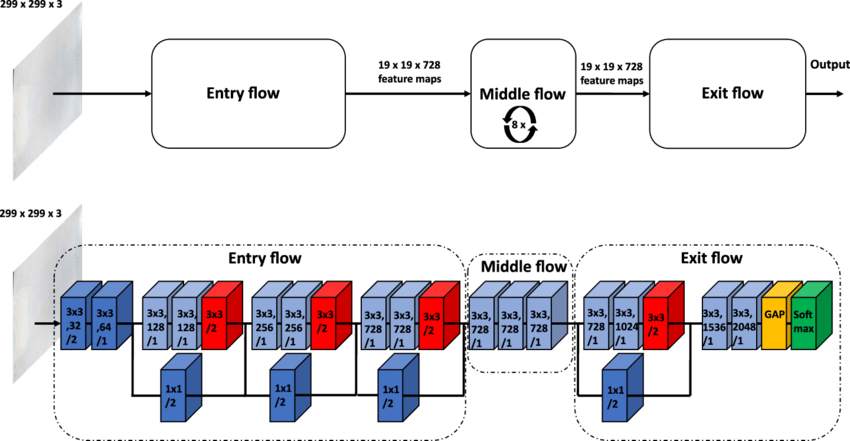

In [ ]:
#default input size of the vgg models = (224,224)
image_size = [224,224]

#Loading the pretrained vgg19 model(pretrained on imagenet dataset) from keras
Xc = Xception(input_shape=image_size+[3], weights = None, include_top = False)

#Freezing the top layers in the model
for layer in Xc.layers:
   layer.trainable = True

# Building the custom layers for bb regression on top of vgg19 model
out = Xc.output
flat = Flatten()(out)
FCL1 = Dense(128,activation = 'relu')(flat)
FCL2 = Dense(32,activation = 'relu')(FCL1)
OutR = Dense(4)(FCL2)

# Building the custom layers for multiclass Classification on top of vgg19 model parallel to regression layer
out = Xc.output
flat = Flatten()(out)
ClassL1 = Dense(128,activation = 'relu')(flat)
OutL = Dense(6,activation = 'softmax')(ClassL1)

model_X = Model(inputs = Xc.input, outputs = [OutR,OutL])

# Using Mean Squared Error loss and General Intersection over Union metric for the model.
model_X.compile(
    loss = [tensorflow.keras.losses.MeanSquaredError(),tensorflow.keras.losses.CategoricalCrossentropy()],
    optimizer = 'adam',
    metrics = [tensorflow.keras.metrics.MeanSquaredError(),tensorflow.keras.metrics.CategoricalCrossentropy()]
)
model_X.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
# Train the model for 20 epochs
trained_model = model_X.fit(train_images, [train_targets,train_classes],
                validation_data = (val_images, [val_targets,val_classes]),
                batch_size=10,
                epochs=50,
                shuffle=True,
                verbose=1)

Epoch 1/20
50/50 [==============================] - 20s 253ms/step - loss: 799.6266 - dense_7_loss: 799.5910 - dense_9_loss: 0.0355 - dense_7_mean_squared_error: 799.5910 - dense_7_categorical_crossentropy: 484.0688 - dense_9_mean_squared_error: 0.0045 - dense_9_categorical_crossentropy: 0.0355 - val_loss: 18072.4297 - val_dense_7_loss: 18072.4238 - val_dense_9_loss: 0.0041 - val_dense_7_mean_squared_error: 18072.4238 - val_dense_7_categorical_crossentropy: 494.0879 - val_dense_9_mean_squared_error: 0.0578 - val_dense_9_categorical_crossentropy: 0.0041
Epoch 2/20
50/50 [==============================] - 12s 235ms/step - loss: 110.5509 - dense_7_loss: 110.5509 - dense_9_loss: 0.0000e+00 - dense_7_mean_squared_error: 110.5509 - dense_7_categorical_crossentropy: 452.2798 - dense_9_mean_squared_error: 0.0000e+00 - dense_9_categorical_crossentropy: 0.0000e+00 - val_loss: 17291.9062 - val_dense_7_loss: 17291.9062 - val_dense_9_loss: 0.0000e+00 - val_dense_7_mean_squared_error: 17291.9043 - v

In [ ]:
pred_y = model_X.predict(test_images,
                         batch_size = 100, 
                         verbose = 1)

4/4 [==============================] - 5s 325ms/step


In [ ]:
actual_y = model_X.predict(test_images,
                         batch_size = 100, 
                         verbose = 1)

Loss  = giou_loss(torch.tensor(test_targets.astype(np.float32)), torch.tensor(actual_y[0]))
print(Loss.item())
#CC = tensorflow.metrics.CategoricalCrossentropy()
CC = tfa.metrics.F1Score(num_classes=6, threshold=0.5)
CC.update_state(test_classes,actual_y[1])
CC = CC.result().numpy()
print(CC)

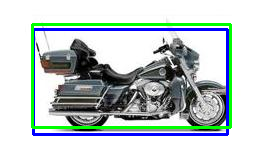

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#y_pred = model.predict(test_images[1])
m = pred_y[0][218]
n = test_targets[218]
image = cv2.imread('/content/drive/MyDrive/Image Processing/Train/MotorBikes/image_0004.jpg')
cv2.rectangle(image, (n[0],n[1]), (n[2],n[3]), (255,0,0), 2)
cv2.rectangle(image, (m[0],m[1]), (m[2],m[3]), (0,255,0), 2)
cv2_imshow(image)
cv2.waitKey(0)
# predicted green
# actual blue

## Resnet50

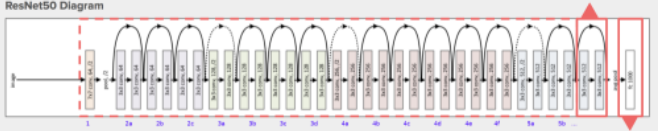

In [ ]:
#default input size of the vgg models = (224,224)
image_size = [224,224]

#Loading the pretrained vgg19 model(pretrained on imagenet dataset) from keras
resnet = ResNet50(input_shape=image_size+[3], weights = None, include_top = False)

#Freezing the top layers in the model
for layer in resnet.layers:
   layer.trainable = True

# Building the custom layers for bb regression on top of vgg19 model
out = resnet.output
flat = Flatten()(out)
FCL1 = Dense(128,activation = 'relu')(flat)
FCL2 = Dense(32,activation = 'relu')(FCL1)
OutR = Dense(4)(FCL2)

# Building the custom layers for multiclass Classification on top of vgg19 model parallel to regression layer
out = resnet.output
flat = Flatten()(out)
ClassL1 = Dense(128,activation = 'relu')(flat)
OutL = Dense(6,activation = 'softmax')(ClassL1)

model_R = Model(inputs = resnet.input, outputs = [OutR,OutL])

# Using Mean Squared Error loss and General Intersection over Union metric for the model.
model_R.compile(
    loss = [tensorflow.keras.losses.MeanSquaredError(),tensorflow.keras.losses.CategoricalCrossentropy()],
    optimizer = 'adam',
    metrics = [tensorflow.keras.metrics.MeanSquaredError(),tensorflow.keras.metrics.CategoricalCrossentropy()]
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [ ]:
# Train the model for 20 epochs
trained_model = model_R.fit(train_images, [train_targets,train_classes],
                validation_data = (val_images, [val_targets,val_classes]),
                batch_size=100,
                epochs=20,
                shuffle=True,
                verbose=1)

Epoch 1/20
50/50 [==============================] - 15s 162ms/step - loss: 1042.9476 - dense_12_loss: 1042.8995 - dense_14_loss: 0.0481 - dense_12_mean_squared_error: 1042.8995 - dense_12_categorical_crossentropy: 501.4360 - dense_14_mean_squared_error: 0.3322 - dense_14_categorical_crossentropy: 0.0481 - val_loss: 4298347.5000 - val_dense_12_loss: 4298347.5000 - val_dense_14_loss: 0.0000e+00 - val_dense_12_mean_squared_error: 4298347.5000 - val_dense_12_categorical_crossentropy: 494.0441 - val_dense_14_mean_squared_error: 0.3333 - val_dense_14_categorical_crossentropy: 0.0000e+00
Epoch 2/20
50/50 [==============================] - 7s 143ms/step - loss: 238.4636 - dense_12_loss: 238.4636 - dense_14_loss: 0.0000e+00 - dense_12_mean_squared_error: 238.4636 - dense_12_categorical_crossentropy: 453.4261 - dense_14_mean_squared_error: 0.3333 - dense_14_categorical_crossentropy: 0.0000e+00 - val_loss: 455146.4062 - val_dense_12_loss: 455146.4062 - val_dense_14_loss: 0.0000e+00 - val_dense_12

In [ ]:
pred_y = model_R.predict(test_images,
                         batch_size = 100, 
                         verbose = 1)

4/4 [==============================] - 4s 225ms/step


In [ ]:
actual_y = model_R.predict(test_images,
                         batch_size = 100, 
                         verbose = 1)

Loss  = giou_loss(torch.tensor(test_targets.astype(np.float32)), torch.tensor(actual_y[0]))
print(Loss.item())
#CC = tensorflow.metrics.CategoricalCrossentropy()
CC = tfa.metrics.F1Score(num_classes=6, threshold=0.5)
CC.update_state(test_classes,actual_y[1])
CC = CC.result().numpy()
print(CC)

4/4 [==============================] - 3s 613ms/step
53.501956939697266
[0.7017544  0.10840108 0.98507464 0.42553192 1.         0.23920268]


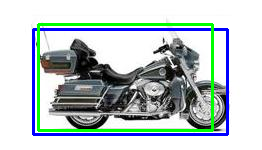

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#y_pred = model.predict(test_images[1])
m = pred_y[0][218]
n = test_targets[218]
image = cv2.imread('/content/drive/MyDrive/Image Processing/Train/MotorBikes/image_0004.jpg')
cv2.rectangle(image, (n[0],n[1]), (n[2],n[3]), (255,0,0), 2)
cv2.rectangle(image, (m[0],m[1]), (m[2],m[3]), (0,255,0), 2)
cv2_imshow(image)
cv2.waitKey(0)
# predicted green
# actual blue